<a href="https://colab.research.google.com/github/chuscigales/streamlit_palladium/blob/main/trained_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import datetime as dt
import sklearn
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
data = '/content/drive/MyDrive/TFM - Palladium/PROYECTO LIMPIO/latam_sin_covid.csv'
df_data = pd.read_csv(data, sep=",")
df_data

FileNotFoundError: ignored

In [ ]:
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'ID_HOTEL',
       'COD_CENTRAL', 'LOCALIZADOR', 'LLEGADA', 'SALIDA', 'NOCHES', 'REGIMEN',
       'TIPO', 'USO', 'PAX', 'ADULTOS', 'NENES', 'BEBES', 'TIPO_CLIENTE',
       'CLIENTE', 'REPETIDOR', 'MANTENER_HIST', 'MULTIPLE', 'CONTRATO',
       'MONEDA', 'TIPOFACTURA', 'STATUS', 'ID_MOTIVO', 'SUPLETORIA', 'CUNAS',
       'FECHA_MOD', 'FECHA_TTOO', 'DEADLINE', 'SEGMENTO', 'FUENTE',
       'FIDELIDAD', 'NUMSOCIO', 'SEGMENTOCREDITO', 'TRATO', 'PAIS', 'VUELO',
       'VALHAB', 'VALPEN', 'VALSERV', 'VALFIJOS', 'COMERCIALIZADORA',
       'CM_ID_CONTRATO', 'CM_CONTRATO', 'CMVALHAB', 'CMVALPEN', 'CMCVALSERV',
       'REGFACTURA', 'GRATIS', 'ID_TIPODOCUMENTO', 'ID_TIPOGRATIS',
       'ID_VIAJACON', 'VIAJACON', 'CUPO', 'TIPODOCUMENTO',
       'Price_Comercializadora', 'Price', 'ESTADO_RESERVA', 'CANELACION',
       'TARGET', 'ADR', 'MES_LLEGADA'],
      dtype='object')

In [ ]:
df_data["MONEDA"].unique()

array(['Dólar', 'Peso Mexicano'], dtype=object)

In [ ]:
df_data = pd.get_dummies(df_data, columns = ["MONEDA", "FIDELIDAD","TIPO_CLIENTE"])

In [ ]:
#Eliminamos columnas que creemos que no son útiles
df_data.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'LOCALIZADOR', 'ADULTOS', 'NENES', 'BEBES', 'CM_ID_CONTRATO', 'CM_CONTRATO', 'SEGMENTOCREDITO'], axis = 'columns', inplace=True)

In [ ]:
#Cambiamos formato de fecha
df_data['FECHA_TTOO'] = pd.to_datetime(df_data['FECHA_TTOO'], format="%Y-%m-%d %H:%M:%S")

In [ ]:
#Cambiamos formato de fecha LLEGADA
df_data['LLEGADA'] = pd.to_datetime['LLEGADA'], format="%Y-%m-%d")

In [ ]:
#Creamos columna con los días de pre. de reserva hasta la llegada
df_data["LEAD_TIME"] = (df_data['LLEGADA'] - df_data['FECHA_TTOO']).dt.days

In [ ]:
df_data["MES_LLEGADA"] = df_data['LLEGADA'].dt.month

In [ ]:
df_data["WEEKDAY_LLEGADA"] = df_data['LLEGADA'].dt.weekday

In [ ]:
df_data["WEEK_LLEGADA"] = df_data['LLEGADA'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.model_selection import KFold

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
folds = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

In [ ]:
from sklearn.model_selection import train_test_split
feature_list=["NOCHES","ADR","PAX", "LEAD_TIME", "FIDELIDAD_Palladium Rewards", "FIDELIDAD_Palladium Connect", "MES_LLEGADA", "WEEKDAY_LLEGADA", "WEEK_LLEGADA", 'MONEDA_Dólar', 'MONEDA_Peso Mexicano', 'COMERCIALIZADORA']
#X = df_data.drop("ESTADO_RESERVA", axis = 1)
X = df_data[feature_list]
feature_names = X.columns
X = X.values

y = df_data["ESTADO_RESERVA"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.2, stratify=y
)

Bagging (Random Forest)

In [ ]:
#Bagging (Random Forest)
#Con none pilla la maoyor profundidad posible, random classfier cuanto menos estimators mas complejo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

metrics = []

for n, (i_train_fold, i_val_fold) in enumerate(folds.split(X_train, y_train)):

  x = X_train[i_train_fold]
  y = y_train[i_train_fold]
  x_val = X_train[i_val_fold]
  y_val = y_train[i_val_fold]

  rf = RandomForestClassifier(n_estimators = 115, max_depth=	15).fit(x, y)
  y_pred = rf.predict_proba(x)[:, 1]
  y_pred_val = rf.predict_proba(x_val)[:, 1]

  auc_train = roc_auc_score(y, y_pred)
  auc_val = roc_auc_score(y_val, y_pred_val)
  
  metrics.append((auc_train, auc_val))

  print(f"Fold #{n + 1}: auc_train {auc_train: .4f} - auc_val {auc_val: .4f}")

Fold #1: auc_train  0.8370 - auc_val  0.7852
Fold #2: auc_train  0.8363 - auc_val  0.7862
Fold #3: auc_train  0.8370 - auc_val  0.7869
Fold #4: auc_train  0.8346 - auc_val  0.7867
Fold #5: auc_train  0.8374 - auc_val  0.7881


In [ ]:
rf predict.probability

NameError: ignored

In [ ]:
# Save Data
with open('nombredelmodelo.pickle', 'wb') as handle:
    pickle.dump(rf, handle, protocol=pickle.HIGHEST_PROTOCOL)
# Load Data
with open('mombredelmodelo.pickle', 'rb') as handle:
    rf = pickle.load(rf)


<BarContainer object of 12 artists>

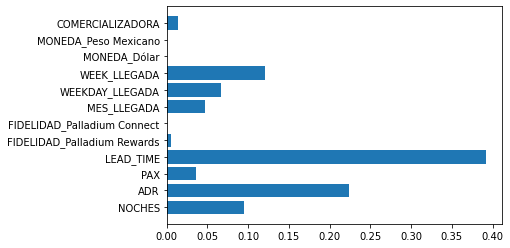

In [ ]:
plt.barh(feature_names, rf.feature_importances_)

In [ ]:
  #creo que no hay que ejecutar
  rf = RandomForestClassifier(n_estimators = 100, max_depth=	20).fit(X_train, y_train)
  y_pred = rf.predict_proba(X_train)[:, 1]
  y_pred_val = rf.predict_proba(X_test)[:, 1]


In [ ]:
 #creo que no hay que ejecutar
  auc_train = roc_auc_score(y_train, y_pred)
  auc_val = roc_auc_score(y_test, y_pred_val)
  print(auc_train, auc_val)

0.9289665612176334 0.8129184431354711
